# Installing Colab Dependencies & Libraries

In [20]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = "1E_HRqw3sdsAJcl7o1KuK-k8X5JvA8nEp"
file_name = "autism_feature_engg_data.csv"
file_downloaded = drive.CreateFile({'id': file_id})
file_downloaded.GetContentFile(file_name)

# Ignore IPythonNoteook Warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
np.random.seed(1337) # for reproducibility

# Loading Data

In [2]:
file_name = "autism_feature_engg_data.csv"
data = pd.read_csv(file_name, header=0)

print("Total No of Rows: {} \nTotal No of Columns: {}".format(data.shape[0], data.shape[1]))

Total No of Rows: 704 
Total No of Columns: 16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 16 columns):
A1_Score     704 non-null int64
A2_Score     704 non-null int64
A3_Score     704 non-null int64
A4_Score     704 non-null int64
A5_Score     704 non-null int64
A6_Score     704 non-null int64
A7_Score     704 non-null int64
A8_Score     704 non-null int64
A9_Score     704 non-null int64
A10_Score    704 non-null int64
age          704 non-null int64
ethnicity    704 non-null object
jundice      704 non-null object
austim       704 non-null object
result       704 non-null int64
Class/ASD    704 non-null object
dtypes: int64(12), object(4)
memory usage: 88.1+ KB


# Encoding Categorical Features

In [11]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

for i in data.select_dtypes(include=['object']).columns:
    data[i] = LabelEncoder().fit_transform(data[i])

# Separating X and Y features

In [12]:
X = data.loc[:, data.columns!='Class/ASD']
y = data.loc[:, data.columns=='Class/ASD']

In [13]:
pd.DataFrame(y)['Class/ASD'].value_counts()

0    515
1    189
Name: Class/ASD, dtype: int64

# 10-Fold Cross Valiation Setup

In [14]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [15]:
from sklearn.metrics import confusion_matrix, make_scorer

def accuracy(y_true, y_pred): 
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return (tp+tn)/(tp+tn+fp+fn)

def precision(y_true, y_pred): 
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return (tp/(tp+fp))

def sensitivity(y_true, y_pred): 
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return (tp/(tp+fn))

def specificity(y_true, y_pred): 
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return (tn/(tn+fp))

def f1_score(y_true, y_pred): 
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return (2 * (tp/(tp+fp)) * (tp/(tp+fn))) / ((tp/(tp+fp)) + (tp/(tp+fn)))

scoring = {'accuracy' : make_scorer(accuracy), 
           'precision' : make_scorer(precision),
           'sensitivity' : make_scorer(sensitivity),
           'specificity' : make_scorer(specificity),
           'f1-score' : make_scorer(f1_score)}

# Modeling with CV

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Logistic Regression

In [18]:
lr_model = LogisticRegression(random_state=1)
lr_scores = cross_validate(lr_model, X, y, scoring=scoring, cv=kf)

/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

## Linear Discriminant Analysis

In [19]:
lda_model = LinearDiscriminantAnalysis()
lda_scores = cross_validate(lda_model, X, y, scoring=scoring, cv=kf)

/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-v

## Naive Bayes

In [20]:
nb_model = BernoulliNB()
nb_scores = cross_validate(nb_model, X, y, scoring=scoring, cv=kf)

/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

## K-Neighbors Classifier

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_scores = cross_validate(knn_model, X, y, scoring=scoring, cv=kf)

/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversi

## SVM

In [22]:
svm_model = SVC(kernel="linear", C=0.01, random_state=1)
svm_scores = cross_validate(svm_model, X, y, scoring=scoring, cv=kf)

/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

## Random Forest Classifier

In [26]:
rf_model = RandomForestClassifier(random_state=1)
rf_scores = cross_validate(rf_model, X, y, scoring=scoring, cv=kf)

/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionW

# Print Model Scores

In [24]:
print("{:.2}\t{:.2}\t{:.2}\t{:.2}\t{:.2}".format(lr_scores['test_accuracy'].mean(),
                                                 lr_scores['test_precision'].mean(),
                                                 lr_scores['test_sensitivity'].mean(),
                                                 lr_scores['test_specificity'].mean(),
                                                 lr_scores['test_f1-score'].mean()))

print("{:.2}\t{:.2}\t{:.2}\t{:.2}\t{:.2}".format(lda_scores['test_accuracy'].mean(),
                                                 lda_scores['test_precision'].mean(),
                                                 lda_scores['test_sensitivity'].mean(),
                                                 lda_scores['test_specificity'].mean(),
                                                 lda_scores['test_f1-score'].mean()))

print("{:.2}\t{:.2}\t{:.2}\t{:.2}\t{:.2}".format(nb_scores['test_accuracy'].mean(),
                                                 nb_scores['test_precision'].mean(),
                                                 nb_scores['test_sensitivity'].mean(),
                                                 nb_scores['test_specificity'].mean(),
                                                 nb_scores['test_f1-score'].mean()))

print("{:.2}\t{:.2}\t{:.2}\t{:.2}\t{:.2}".format(knn_scores['test_accuracy'].mean(),
                                                 knn_scores['test_precision'].mean(),
                                                 knn_scores['test_sensitivity'].mean(),
                                                 knn_scores['test_specificity'].mean(),
                                                 knn_scores['test_f1-score'].mean()))

print("{:.2}\t{:.2}\t{:.2}\t{:.2}\t{:.2}".format(svm_scores['test_accuracy'].mean(),
                                                 svm_scores['test_precision'].mean(),
                                                 svm_scores['test_sensitivity'].mean(),
                                                 svm_scores['test_specificity'].mean(),
                                                 svm_scores['test_f1-score'].mean()))

print("{:.2}\t{:.2}\t{:.2}\t{:.2}\t{:.2}".format(rf_scores['test_accuracy'].mean(),
                                                 rf_scores['test_precision'].mean(),
                                                 rf_scores['test_sensitivity'].mean(),
                                                 rf_scores['test_specificity'].mean(),
                                                 rf_scores['test_f1-score'].mean()))

0.97	0.94	0.93	0.98	0.93
0.96	0.93	0.93	0.97	0.93
0.97	0.93	0.95	0.97	0.94
0.97	0.99	0.89	1.0	0.94
0.99	1.0	0.98	1.0	0.99
1.0	1.0	1.0	1.0	1.0


/home/imran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


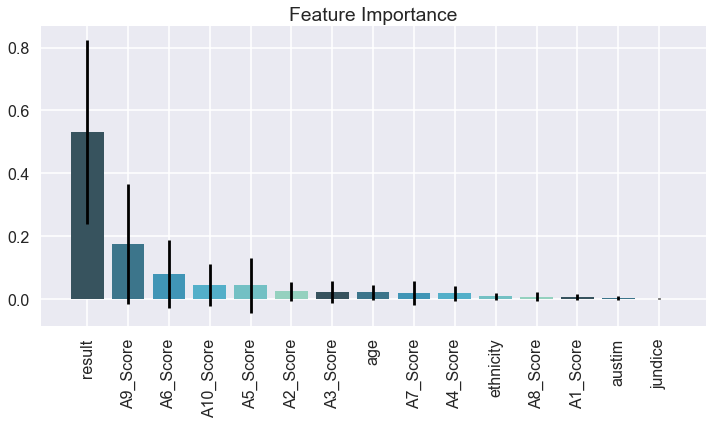

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", context="poster")
%matplotlib inline

rf_model.fit(X, y)
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
f, ax = plt.subplots(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center", color=sns.color_palette("GnBu_d"))
plt.xticks(range(X.shape[1]), names, rotation=90)
# plt.show()
plt.tight_layout()
f.savefig("rf_imp.eps")